In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Candidate_tech_evaluation_candidate_copy_data science_fraud.csv')

df.head(5)

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,149671,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0
1,15611,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0
2,73178,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0
3,84546,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0
4,35978,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0


__Basic infos and basic checking of the data__

In [9]:
df.columns[0]

'Unnamed: 0'

In [10]:
# Unwanted column has to be dismissed
df.drop(df.columns[0],axis=1,inplace=True)

In [12]:
# Just checking if user_id really doesn't have any duplicate
df['user_id'].nunique() == df.shape[0]

True

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         120000 non-null  int64  
 1   signup_time     120000 non-null  object 
 2   purchase_time   120000 non-null  object 
 3   purchase_value  120000 non-null  int64  
 4   device_id       120000 non-null  object 
 5   source          120000 non-null  object 
 6   browser         120000 non-null  object 
 7   sex             120000 non-null  object 
 8   age             120000 non-null  int64  
 9   ip_address      120000 non-null  float64
 10  class           120000 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 10.1+ MB


In [14]:
# Apparently no NaNs on the dataset, but just in case
df.isna().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
class             False
dtype: bool

Now I'm gonna check column by column

The next column is _device_id_ , I'll check if there are no duplicates among samples

In [126]:
df['device_id'].nunique() == df.shape[0]

False

Apparently there are some duplicates, but according to the feature description it's sort of expected and not a real problem.

Since there is a column to represent the id of each sample, the _device_id_ can be eliminated in order to simplify the dataset. 

Moreover, will make it a lot easier to run any given ML model at the end at lower computational cost and no penalties

In [127]:
df.drop('device_id',axis=1,inplace=True)

In [15]:
df['signup_time'][0]

'7/15/2015 4:36'

In [16]:
df['purchase_time'][0]

'9/10/2015 14:17'

__Regarding columns that deal with time/dates__

The columns dealing with time are strings and they include dates.

I'm gona break _signup_time_ and _purchase_time_ columns into other columns for the years, the months, days of the month and the hours

I might group the days later on this work according to the day of the week, if I find it useful

In [17]:
df['signup_date'] = df['signup_time'].apply(lambda x: x.split(' ')[0].strip())

In [18]:
df['signup_date_hour'] = df['signup_time'].apply(lambda x: x.split(' ')[1].strip())

In [19]:
df['signup_date_hour'] = df['signup_date_hour'].apply(lambda x: x.split(':')[0].strip())

df['signup_date_hour'] = df['signup_date_hour'].astype('int')

In [20]:
df['signup_date_hour'].unique()

array(['4', '12', '0', '13', '21', '20', '7', '1', '16', '2', '11', '5',
       '15', '6', '23', '17', '22', '19', '18', '14', '10', '3', '9', '8'],
      dtype=object)

In [22]:
df['signup_date_year'] = df['signup_date'].apply(lambda x: x.split('/')[2].strip())

In [23]:
df['signup_date_year'] = df['signup_date_year'].astype('int')

In [24]:
df['signup_date_day'] = df['signup_date'].apply(lambda x: x.split('/')[1].strip())

df['signup_date_day'] = df['signup_date_day'].astype('int')

In [26]:
df['signup_date_month'] = df['signup_date'].apply(lambda x: x.split('/')[0].strip())

df['signup_date_month'] = df['signup_date_month'].astype('int')

In [30]:
df['signup_date_month'].unique()

array([7, 1, 3, 2, 4, 6, 5, 8])

In [31]:
df['signup_date_year'].unique()

array([2015])

In [32]:
df['signup_date_day'].unique()

array([15, 24, 11,  7,  8, 20, 30, 10,  5, 23, 12, 21, 17,  6,  2, 18, 29,
       28, 27, 14, 26, 19,  4, 22, 13,  1,  3,  9, 16, 25, 31])

In [33]:
df['signup_date_month'].unique()

array([7, 1, 3, 2, 4, 6, 5, 8])

__Breaking Purchase time column into: hour, day, month__

In [36]:
df['purchase_date_hour'] = df['purchase_time'].apply(lambda x: x.split(' ')[1].strip())

df['purchase_date_hour'] = df['purchase_date_hour'].apply(lambda x: x.split(':')[0].strip())

df['purchase_date_hour'].unique()

array(['14', '4', '12', '10', '20', '16', '17', '13', '21', '11', '5',
       '1', '7', '6', '18', '0', '3', '2', '23', '22', '15', '8', '9',
       '19'], dtype=object)

In [37]:
df['purchase_date_hour'] = df['purchase_date_hour'].astype('int')

0         14
1          4
2         12
3         10
4         14
          ..
119995    22
119996     7
119997     4
119998    16
119999    13
Name: purchase_date_hour, Length: 120000, dtype: int32

In [39]:
df['purchase_date_hour'].unique()

array([14,  4, 12, 10, 20, 16, 17, 13, 21, 11,  5,  1,  7,  6, 18,  0,  3,
        2, 23, 22, 15,  8,  9, 19])

In [40]:
df['purchase_date'] = df['purchase_time'].apply(lambda x: x.split(' ')[0].strip())

In [41]:
df['purchase_date_month'] = df['purchase_date'].apply(lambda x: x.split('/')[0].strip())

df['purchase_date_month'] = df['purchase_date_month'].astype('int')

In [31]:
df['purchase_date_month'].unique()

array([ 9,  4,  1,  8,  6, 10,  7,  5,  3,  2, 12, 11])

In [43]:
df['purchase_date_day'] = df['purchase_date'].apply(lambda x: x.split('/')[1].strip())

df['purchase_date_day'] = df['purchase_date_day'].astype('int')

df['purchase_date_day'].unique()

array([10, 13,  5,  9,  3, 30, 25, 20, 12,  2, 19, 24, 26,  4, 28, 15, 16,
       27,  6, 14, 23, 21, 22, 31,  8,  7, 11, 18, 29, 17,  1])

In [44]:
df['purchase_date_year'] = df['purchase_date'].apply(lambda x: x.split('/')[2].strip())
df['purchase_date_year'].unique()

array(['2015'], dtype=object)

Now I don't need _signup_time_ and _purchase_time_ in the dataset anymore

Also since there is just data from one unique year (2015), I'm gonna delete the respective columns

In [45]:
df.drop('signup_time',axis=1,inplace=True)

In [46]:
df.drop('purchase_time',axis=1,inplace=True)

In [47]:
df.drop('purchase_date_year',axis=1,inplace=True)

In [48]:
df.drop('signup_date_year',axis=1,inplace=True)

__Creating datasets for both cases: fraudulent or not__

__df_no_fraude and df_yes_fraude__

Dealing with non fraudulent cases first

In [51]:
# Creating a new dataset just for non fraudulent cases
df_no_fraude = df[ df['class'] == 0 ].copy()

df_yes_fraude = df[ df['class'] == 1 ].copy()

In [58]:
print(df_no_fraude.shape[0])
print(df_yes_fraude.shape[0])
print(f'Non Fraudulent to Fraudulent ratio: {df_no_fraude.shape[0] / df_yes_fraude.shape[0]}')

108735
11265
Non Fraudulent to Fraudulent ratio: 9.652463382157125


__PS:__ Classes for Non Fraudulent and Fraudulent cases are severely unbalenced.
Later on I'm gonna make them be balenced by using SMOTE (probably)

### __Analysis__ of _signup_date_hour_

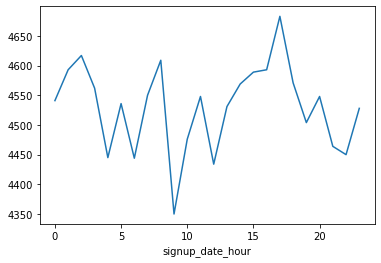

In [59]:
# Plotting the non fraudulent cases per hour for signup feature
df_no_fraude.groupby('signup_date_hour').count()['class'].plot();

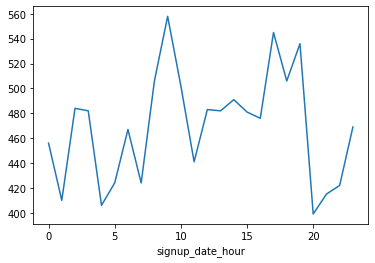

In [60]:
# Plotting the fraudulent cases per hour for signup feature
df_yes_fraude.groupby('signup_date_hour').count()['class'].plot();

From the plottings of fraudulent and non fraudulent cases it's hard to tell if there is any significative correspondence.
Seems that around 17 hour there is a peak for both plots, but it requires further investigation

In [61]:
# Total cases of non fraudulent class sorted by the total amount per hour
df_no_fraude.groupby('signup_date_hour').count()['class'].sort_values(ascending=False)

signup_date_hour
17    4683
2     4617
8     4609
16    4593
1     4593
15    4589
18    4571
14    4569
3     4562
7     4550
20    4548
11    4548
0     4541
5     4536
13    4531
23    4528
19    4504
10    4476
21    4464
22    4450
4     4445
6     4444
12    4434
9     4350
Name: class, dtype: int64

In [62]:
# The percentage of non fraudulent cases by the hour
df_no_fraude['signup_date_hour'].value_counts(normalize=True) * 100

17    4.306801
2     4.246103
8     4.238746
16    4.224031
1     4.224031
15    4.220352
18    4.203798
14    4.201959
3     4.195521
7     4.184485
20    4.182646
11    4.182646
0     4.176208
5     4.171610
13    4.167012
23    4.164253
19    4.142181
10    4.116430
21    4.105394
22    4.092519
4     4.087920
6     4.087001
12    4.077804
9     4.000552
Name: signup_date_hour, dtype: float64

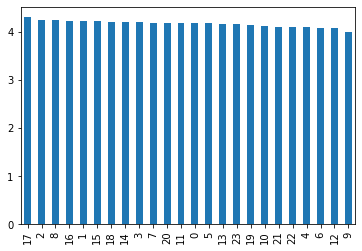

In [63]:
# Plotting the percentage of non fraudulent cases per hour
(df_no_fraude['signup_date_hour'].value_counts(normalize=True) * 100).plot.bar();

Since the all the cases per hour are around ~4% I'm gonna subtract 4% in order to amplify the differences

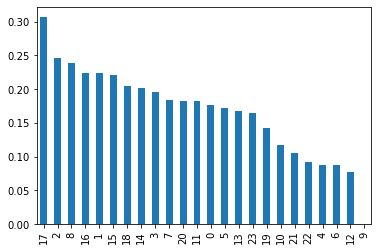

In [64]:
dc = (df_no_fraude['signup_date_hour'].value_counts(normalize=True) * 100)

dc = dc - 4

dc.plot.bar();

_We can see clearly now that there is a peak for non fraudulent cases at 17:00, followed by 2:00 with a big difference, and steadily declining afterwards_

__Now I'm gonna explore the fraudulent cases__

In [65]:
df_yes_fraude['signup_date_hour'].value_counts(normalize=True) * 100

9     4.953395
17    4.837994
19    4.758100
18    4.491789
8     4.491789
10    4.456281
14    4.358633
2     4.296494
12    4.287617
3     4.278739
13    4.278739
15    4.269862
16    4.225477
23    4.163338
6     4.145584
0     4.047936
11    3.914780
7     3.763870
5     3.763870
22    3.746116
21    3.683977
1     3.639592
4     3.604083
20    3.541944
Name: signup_date_hour, dtype: float64

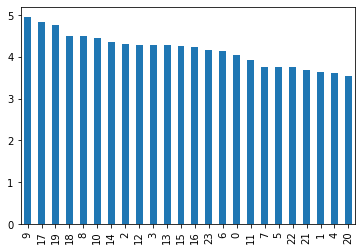

In [66]:
# Plotting the percentage of non fraudulent cases per hour
(df_yes_fraude['signup_date_hour'].value_counts(normalize=True) * 100).plot.bar();

Just like the non fraudulent cases, the fraudulent ones are not so easy to distinguish in pace of hours.
But the peak seems to be 9:00 followed by 17:00, 19:00 and 18:00 with slight differences

I'm gonna do tha same data manipulation to contrast on the plot the differences for each hour

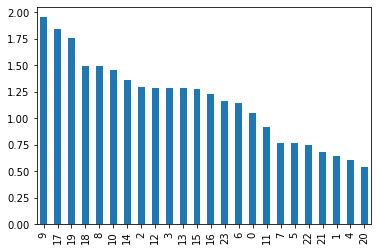

In [67]:
# Since all values were around ~3%, this constant will be subtracted
dc = (df_yes_fraude['signup_date_hour'].value_counts(normalize=True) * 100)

dc = dc - 3

dc.plot.bar();

_Clearly the peak of fraudulent cases is 9:00 followed by 17:00, 19:00 and 18:00 with slight differences, but then the amount of cases decay steadily for the following hours of the sequence_

### __Analysis__ of _purchase_date_ per hour

In [68]:
# Percentage of non fraudulent cases
df_no_fraude['purchase_date_hour'].value_counts(normalize=True) * 100

3     4.282890
6     4.262657
22    4.258978
12    4.247942
14    4.228629
2     4.223111
11    4.207477
23    4.203798
17    4.194602
16    4.178967
15    4.173449
13    4.168851
8     4.162413
9     4.160574
19    4.156895
0     4.142181
5     4.142181
20    4.140341
1     4.128386
7     4.124707
21    4.112751
18    4.098037
4     4.015266
10    3.984917
Name: purchase_date_hour, dtype: float64

Again, the differencse of amount of cases per hours is not so big
So I'm gonna do the same manipulation to extract the real peak and to contrast the difference of ranges per hour

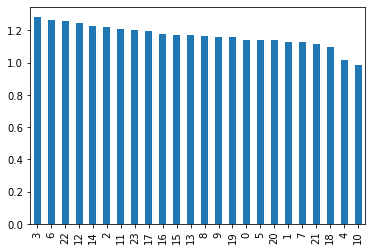

In [69]:
# In order to contrast the plot the differences I'm gonna be subtracting the constant of 3 since its 
# the smallest percentage
dc = df_no_fraude['purchase_date_hour'].value_counts(normalize=True) * 100

dc = dc - 3

dc.plot.bar();

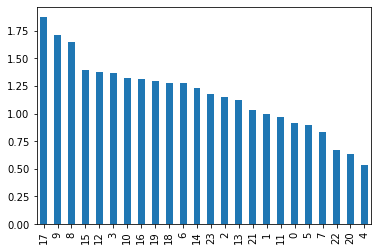

In [70]:
# In order to contrast the plot the differences I'm gonna be subtracting the constant of 3 since its 
# the smallest percentage
dc = df_yes_fraude['purchase_date_hour'].value_counts(normalize=True) * 100

dc = dc - 3

dc.plot.bar();

__Partial conclusions:__ now its clear that the hours of purchase differ from non fraudulent to fraudulent cases. There is no peak of purchase for non fraudulent cases as they gradually decay starting at 03:00 to the rest of the sequence. For fraudulent cases there is a clear peak at 17:00 relative to the rest of the sequence of hours

This feature might be helpful to ML modelling later on

__Moving foreward to avaluation of signup feature per day__

### __Analysis__ of _purchase_date_ per day

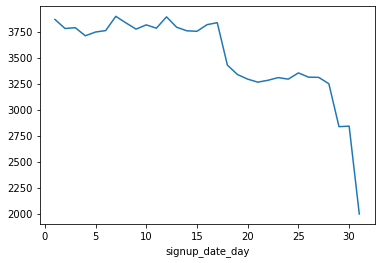

In [71]:
# Plotting the non fraudulent cases per hour for signup feature
df_no_fraude.groupby('signup_date_day').count()['class'].plot();

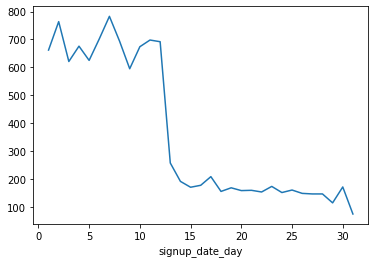

In [72]:
# Plotting the fraudulent cases per hour for signup feature
df_yes_fraude.groupby('signup_date_day').count()['class'].plot();

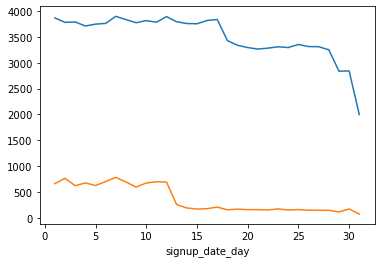

In [73]:
# Plotting the non fraudulent cases per hour for signup feature
df_no_fraude.groupby('signup_date_day').count()['class'].plot();

# Plotting the fraudulent cases per hour for signup feature
df_yes_fraude.groupby('signup_date_day').count()['class'].plot();

I'm gonna plot the two together and "normalize" (undersampling) the non fraudulent cases

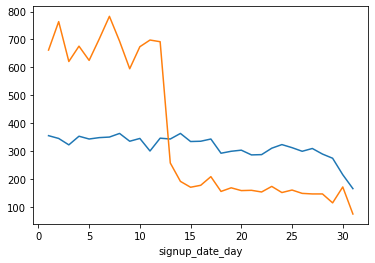

In [74]:
# Plotting the non fraudulent cases per hour for signup feature
df_no_fraude.sample(frac=0.09).groupby('signup_date_day').count()['class'].plot();

# Plotting the fraudulent cases per hour for signup feature
df_yes_fraude.groupby('signup_date_day').count()['class'].plot();

From day 15 moving foreward seems that non fraudulent and fraudulent cases have somewhat similar behavior

I will now examn how this behavior expresses itself for parchases

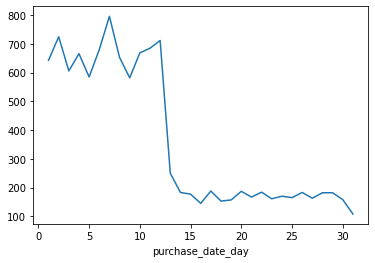

In [76]:
# Plotting the fraudulent cases per hour for purchase feature
df_yes_fraude.groupby('purchase_date_day').count()['class'].plot();

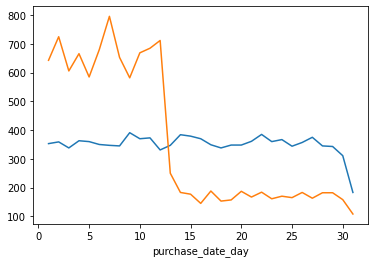

In [77]:
# Plotting the non fraudulent cases per hour for signup feature
df_no_fraude.sample(frac=0.1).groupby('purchase_date_day').count()['class'].plot();

# Plotting the fraudulent cases per hour for signup feature
df_yes_fraude.groupby('purchase_date_day').count()['class'].plot();

From the plottings it truly seems that fraudulent cases tend to happen in the first days of the month, from the 1st to the 2nd week of each month

After that the graphics start to follow nearly the same pattern

### __Analysis__ of _purchase_date_ per day

In [88]:
df_no_fraude['purchase_date_day'].value_counts(normalize=True) * 100

26    3.411965
20    3.377018
18    3.368741
28    3.353106
13    3.350347
23    3.333793
19    3.331034
9     3.323677
5     3.319998
27    3.319998
8     3.315400
22    3.314480
6     3.309882
21    3.308962
4     3.303444
11    3.300685
15    3.290569
14    3.272175
12    3.269416
17    3.254702
16    3.253782
10    3.245505
25    3.240907
3     3.225272
1     3.219754
7     3.216995
24    3.187566
2     3.153538
29    3.056054
30    2.944774
31    1.826459
Name: purchase_date_day, dtype: float64

<AxesSubplot:>

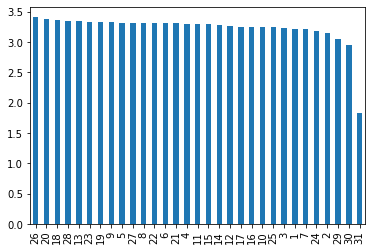

In [92]:
dc = df_no_fraude['purchase_date_day'].value_counts(normalize=True) * 100

dc.plot.bar()

<AxesSubplot:>

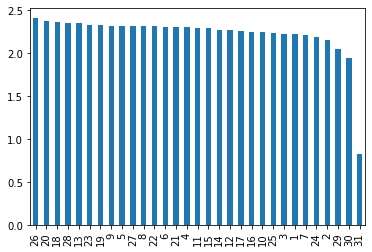

In [96]:
dc = df_no_fraude['purchase_date_day'].value_counts(normalize=True) * 100

dc = dc - 1

dc.plot.bar()

<AxesSubplot:>

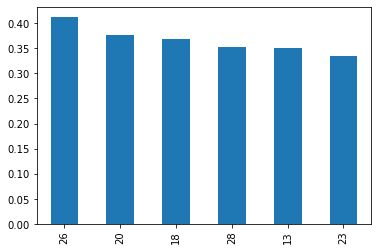

In [91]:
dc = df_no_fraude['purchase_date_day'].value_counts(normalize=True) * 100

dc = dc[:6] - 3

dc.plot.bar()

In [97]:
df_yes_fraude['purchase_date_day'].value_counts(normalize=True) * 100

7     7.066134
2     6.435863
12    6.320462
11    6.080781
6     6.036396
10    5.938748
4     5.912117
8     5.796715
1     5.707945
3     5.379494
5     5.193076
9     5.166445
13    2.219263
17    1.668886
20    1.660009
22    1.633378
14    1.624501
26    1.624501
28    1.615624
29    1.615624
15    1.571238
24    1.509099
21    1.482468
25    1.464714
27    1.446960
23    1.429206
30    1.402574
19    1.393697
18    1.358189
16    1.287173
31    0.958722
Name: purchase_date_day, dtype: float64

<AxesSubplot:>

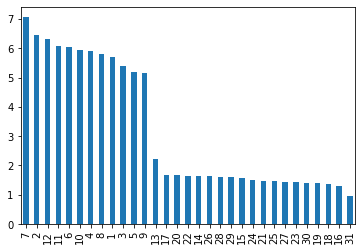

In [98]:
dc = df_yes_fraude['purchase_date_day'].value_counts(normalize=True) * 100

dc.plot.bar();

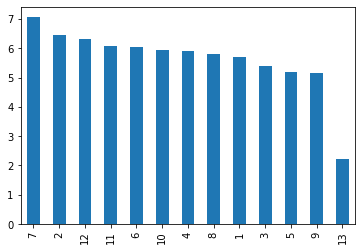

In [110]:
dc = df_yes_fraude['purchase_date_day'].value_counts(normalize=True) * 100

dc[:13].plot.bar();

__Partial conclusions for day purchase analysis:__ 

_It's no possible to differentiate any particular day for non fraudulent transactions, however, for the fraudulent transactions it was clear that some days have more activities than others._

### Analysis of purchase_date per month

<AxesSubplot:xlabel='purchase_date_month'>

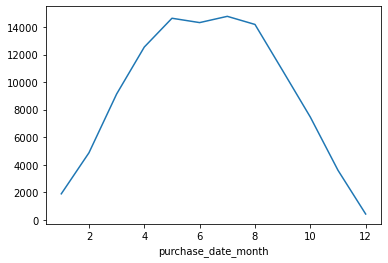

In [119]:
df_no_fraude.groupby('purchase_date_month').count()['class'].plot()

<AxesSubplot:xlabel='purchase_date_month'>

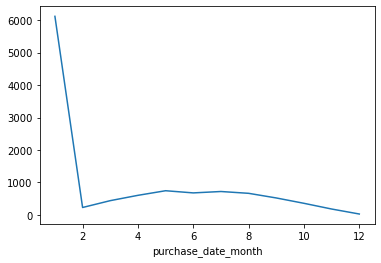

In [118]:
df_yes_fraude.groupby('purchase_date_month').count()['class'].plot()

<AxesSubplot:xlabel='purchase_date_month'>

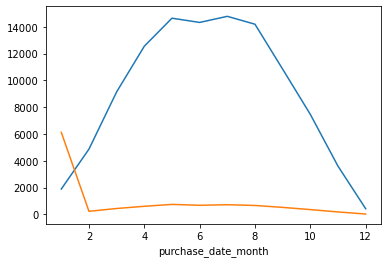

In [123]:
df_no_fraude.groupby('purchase_date_month').count()['class'].plot()

df_yes_fraude.groupby('purchase_date_month').count()['class'].plot()

<AxesSubplot:xlabel='purchase_date_month'>

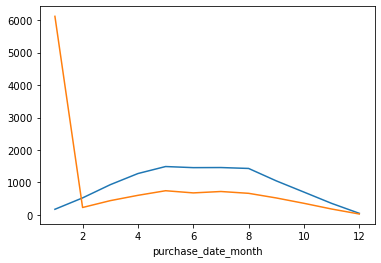

In [122]:
df_no_fraude.sample(frac=0.1).groupby('purchase_date_month').count()['class'].plot()

df_yes_fraude.groupby('purchase_date_month').count()['class'].plot()

In [111]:
df_no_fraude['purchase_date_month'].value_counts(normalize=True) * 100

7     13.596358
5     13.468524
6     13.177910
8     13.054674
4     11.544581
9      9.971030
3      8.406677
10     6.865315
2      4.479698
11     3.309882
1      1.737251
12     0.388100
Name: purchase_date_month, dtype: float64

<AxesSubplot:>

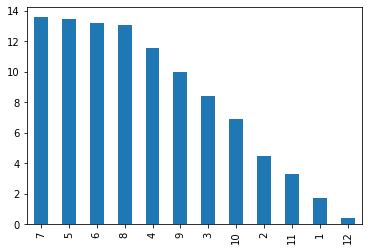

In [114]:
dc = df_no_fraude['purchase_date_month'].value_counts(normalize=True) * 100

dc.plot.bar()

In [125]:
df_yes_fraude['purchase_date_month'].value_counts(normalize=True) * 100

1     54.336440
5      6.595650
7      6.382601
6      6.000888
8      5.885486
4      5.335109
9      4.616067
3      3.879272
10     3.151354
2      2.006214
11     1.588992
12     0.221926
Name: purchase_date_month, dtype: float64

<AxesSubplot:>

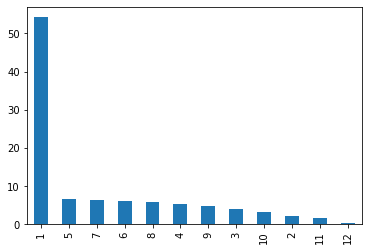

In [115]:
dc = df_yes_fraude['purchase_date_month'].value_counts(normalize=True) * 100

dc.plot.bar()

__Partial conclusions for month purchase analysis:__

_It's no possible to differentiate any particular month for non fraudulent transactions._

_As for fraudulent transactions clearly january seems to be the most frequent._

### Final conclusions so far: features regarding time at any scale (hours,days or months) should be included in the final training data for the classification

### Since this jupyter is getting too heavy for my notebook to process I'm gona go from here to another notebook

_---------------------------------------------------------------------------------------------------------------------_